In [1]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

# Gather data and Data Cleaning

In [3]:
#Input Mojo_budget_updata.csv file
mojo_upd_df = pd.read_csv('Resources/Mojo_budget_update.csv')

In [4]:
#Information about the data
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3243 non-null   object 
 1   title            3243 non-null   object 
 2   year             3243 non-null   int64  
 3   trivia           3243 non-null   object 
 4   mpaa             3082 non-null   object 
 5   release_date     3242 non-null   object 
 6   run_time         3243 non-null   object 
 7   distributor      3228 non-null   object 
 8   director         3243 non-null   object 
 9   writer           3234 non-null   object 
 10  producer         3230 non-null   object 
 11  composer         3138 non-null   object 
 12  cinematographer  3129 non-null   object 
 13  main_actor_1     3243 non-null   object 
 14  main_actor_2     3243 non-null   object 
 15  main_actor_3     3243 non-null   object 
 16  main_actor_4     3240 non-null   object 
 17  budget        

In [5]:
mojo_upd_df = mojo_upd_df.loc[pd.notnull(mojo_upd_df["release_date"])].reset_index(drop=True)


In [6]:
mojo_upd_df = mojo_upd_df.loc[pd.notnull(mojo_upd_df["mpaa"])].reset_index(drop=True)

In [7]:
mojo_upd_df = mojo_upd_df.drop(["distributor","writer","producer","composer","cinematographer","international","worldwide","genre_2","genre_3","genre_4","trivia","html"],axis=1)


In [8]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      3081 non-null   object 
 1   title         3081 non-null   object 
 2   year          3081 non-null   int64  
 3   mpaa          3081 non-null   object 
 4   release_date  3081 non-null   object 
 5   run_time      3081 non-null   object 
 6   director      3081 non-null   object 
 7   main_actor_1  3081 non-null   object 
 8   main_actor_2  3081 non-null   object 
 9   main_actor_3  3081 non-null   object 
 10  main_actor_4  3079 non-null   object 
 11  budget        3081 non-null   float64
 12  domestic      3070 non-null   float64
 13  genre_1       3081 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 337.1+ KB


In [9]:
mojo_upd_df = mojo_upd_df.loc[pd.notnull(mojo_upd_df["domestic"])].reset_index(drop=True)

In [10]:
mojo_upd_df = mojo_upd_df.loc[pd.notnull(mojo_upd_df["main_actor_4"])].reset_index(drop=True)

In [11]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      3068 non-null   object 
 1   title         3068 non-null   object 
 2   year          3068 non-null   int64  
 3   mpaa          3068 non-null   object 
 4   release_date  3068 non-null   object 
 5   run_time      3068 non-null   object 
 6   director      3068 non-null   object 
 7   main_actor_1  3068 non-null   object 
 8   main_actor_2  3068 non-null   object 
 9   main_actor_3  3068 non-null   object 
 10  main_actor_4  3068 non-null   object 
 11  budget        3068 non-null   float64
 12  domestic      3068 non-null   float64
 13  genre_1       3068 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 335.7+ KB


In [12]:
mojo_upd_df.head()

,movie_id,title,year,mpaa,release_date,run_time,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,genre_1
0,tt0099165,The Bonfire of the Vanities,1990,R,December 22,2 hr 5 min,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,Comedy
1,tt0099611,Frankenhooker,1990,R,June 1,1 hr 25 min,Frank Henenlotter,James Lorinz,Joanne Ritchie,Patty Mullen,J.J. Clark,2500000.0,205068.0,Comedy
2,tt0099674,The Godfather: Part III,1990,R,December 25,2 hr 42 min,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,Crime
3,tt0099747,Havana,1990,R,December 14,2 hr 24 min,Sydney Pollack,Robert Redford,Lena Olin,Alan Arkin,Tomas Milian,40000000.0,9243140.0,Drama
4,tt0100029,Lionheart,1990,R,January 11,1 hr 48 min,Sheldon Lettich,Jean-Claude Van Damme,Harrison Page,Deborah Rennard,Lisa Pelikan,6000000.0,24078196.0,Action


In [13]:
mojo_upd_df.columns


Index(['movie_id', 'title', 'year', 'mpaa', 'release_date', 'run_time',
       'director', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4', 'budget', 'domestic', 'genre_1'],
      dtype='object')

In [14]:
mojo_upd_df.run_time.value_counts()

1 hr 41 min    92
1 hr 30 min    87
1 hr 40 min    81
1 hr 38 min    80
1 hr 49 min    79
1 hr 46 min    77
1 hr 37 min    77
1 hr 35 min    75
1 hr 44 min    75
1 hr 39 min    75
1 hr 45 min    73
1 hr 47 min    72
1 hr 36 min    72
1 hr 48 min    66
1 hr 42 min    65
1 hr 34 min    65
1 hr 31 min    64
1 hr 32 min    64
1 hr 33 min    62
1 hr 50 min    60
1 hr 29 min    57
1 hr 58 min    57
1 hr 43 min    56
1 hr 56 min    56
1 hr 28 min    56
1 hr 53 min    56
1 hr 55 min    54
1 hr 57 min    51
1 hr 52 min    50
1 hr 51 min    50
2 hr 4 min     50
2 hr 3 min     45
1 hr 59 min    44
2 hr 2 min     43
1 hr 26 min    43
2 hr           42
1 hr 54 min    40
1 hr 27 min    40
2 hr 1 min     37
2 hr 8 min     35
2 hr 5 min     33
2 hr 10 min    32
2 hr 7 min     29
1 hr 24 min    27
2 hr 12 min    26
2 hr 9 min     25
2 hr 15 min    25
1 hr 25 min    25
2 hr 6 min     24
2 hr 11 min    24
1 hr 23 min    22
2 hr 13 min    21
1 hr 21 min    20
2 hr 16 min    18
2 hr 14 min    18
2 hr 18 mi

In [15]:
#Convert run_time in to minutes
times = []

for index,row in mojo_upd_df.iterrows():
    vals = row.run_time.split(" ")
    if len(vals)>2:
        run_time = int(vals[0])*60 + int(vals[2])    
    else:
        run_time = int(vals[0])*60
    times.append(run_time)

mojo_upd_df["runtime_conv"] = times    

In [16]:
mojo_upd_df.groupby("genre_1").runtime_conv.mean()

genre_1
Action         112.985393
Adventure      103.168459
Animation       88.545455
Biography      123.445714
Comedy         102.736330
Crime          113.814433
Documentary     97.857143
Drama          115.224280
Family         118.000000
Fantasy        103.500000
Horror          97.880503
Music           93.000000
Mystery        118.222222
Romance        106.000000
Sci-Fi          96.333333
Name: runtime_conv, dtype: float64

In [17]:
#Combining release date and year

# mojo_upd_df["full_date"] = mojo_upd_df["release_date"]+ str(mojo_upd_df["year"])


full_date = []

for index,row in mojo_upd_df.iterrows():
    vals = str(row["release_date"]) + " " + str(row["year"])
    full_date.append(vals)

mojo_upd_df["full_date"] = full_date   
mojo_upd_df["full_date"] = pd.to_datetime(mojo_upd_df["full_date"])                    
mojo_upd_df.head()

,movie_id,title,year,mpaa,release_date,run_time,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,genre_1,runtime_conv,full_date
0,tt0099165,The Bonfire of the Vanities,1990,R,December 22,2 hr 5 min,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,Comedy,125,1990-12-22
1,tt0099611,Frankenhooker,1990,R,June 1,1 hr 25 min,Frank Henenlotter,James Lorinz,Joanne Ritchie,Patty Mullen,J.J. Clark,2500000.0,205068.0,Comedy,85,1990-06-01
2,tt0099674,The Godfather: Part III,1990,R,December 25,2 hr 42 min,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,Crime,162,1990-12-25
3,tt0099747,Havana,1990,R,December 14,2 hr 24 min,Sydney Pollack,Robert Redford,Lena Olin,Alan Arkin,Tomas Milian,40000000.0,9243140.0,Drama,144,1990-12-14
4,tt0100029,Lionheart,1990,R,January 11,1 hr 48 min,Sheldon Lettich,Jean-Claude Van Damme,Harrison Page,Deborah Rennard,Lisa Pelikan,6000000.0,24078196.0,Action,108,1990-01-11


In [18]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      3068 non-null   object        
 1   title         3068 non-null   object        
 2   year          3068 non-null   int64         
 3   mpaa          3068 non-null   object        
 4   release_date  3068 non-null   object        
 5   run_time      3068 non-null   object        
 6   director      3068 non-null   object        
 7   main_actor_1  3068 non-null   object        
 8   main_actor_2  3068 non-null   object        
 9   main_actor_3  3068 non-null   object        
 10  main_actor_4  3068 non-null   object        
 11  budget        3068 non-null   float64       
 12  domestic      3068 non-null   float64       
 13  genre_1       3068 non-null   object        
 14  runtime_conv  3068 non-null   int64         
 15  full_date     3068 non-null   datetime

In [19]:
mojo_upd_df = mojo_upd_df.drop(["run_time","release_date"],axis=1)

In [20]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      3068 non-null   object        
 1   title         3068 non-null   object        
 2   year          3068 non-null   int64         
 3   mpaa          3068 non-null   object        
 4   director      3068 non-null   object        
 5   main_actor_1  3068 non-null   object        
 6   main_actor_2  3068 non-null   object        
 7   main_actor_3  3068 non-null   object        
 8   main_actor_4  3068 non-null   object        
 9   budget        3068 non-null   float64       
 10  domestic      3068 non-null   float64       
 11  genre_1       3068 non-null   object        
 12  runtime_conv  3068 non-null   int64         
 13  full_date     3068 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 335.7+ KB


<AxesSubplot:title={'center':'Unique values per feature'}>

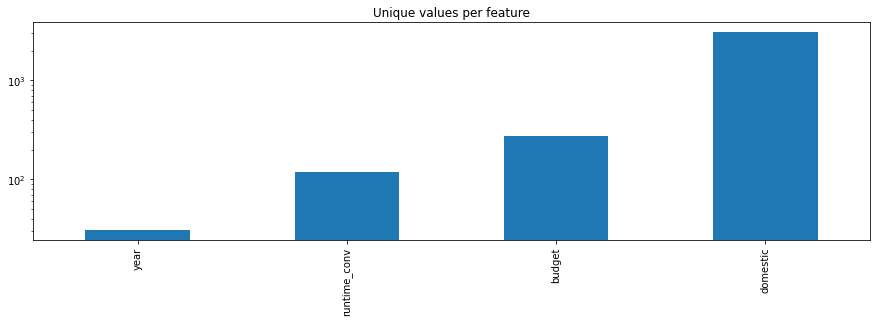

In [21]:
unique_values = mojo_upd_df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True,figsize=(15,4),title = "Unique values per feature")

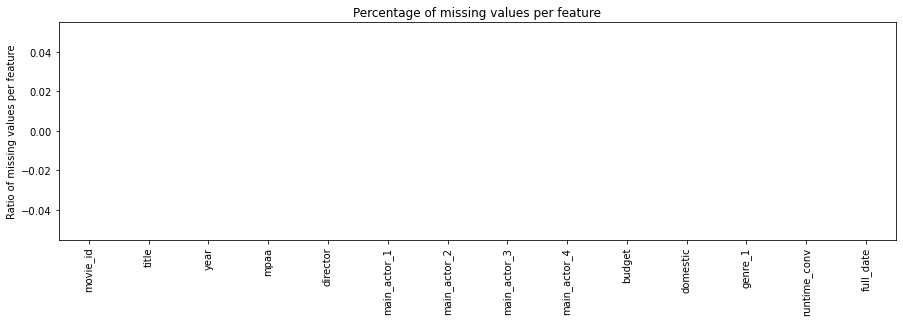

In [22]:
mojo_upd_df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [23]:
mojo_upd_df.describe()

,year,budget,domestic,runtime_conv
count,3068.000000,3.068000e+03,3.068000e+03,3068.000000
mean,2006.904824,4.727161e+07,6.192603e+07,109.282595
std,7.074530,4.740497e+07,8.047241e+07,18.465011
min,1990.000000,1.100000e+03,9.040000e+02,68.000000
25%,2001.000000,1.500000e+07,1.386308e+07,96.000000
50%,2007.000000,3.000000e+07,3.590826e+07,106.000000
75%,2013.000000,6.500000e+07,7.714734e+07,120.000000
max,2020.000000,3.560000e+08,9.366622e+08,242.000000


In [24]:
mojo_upd_df.shape

(3068, 14)

In [25]:
mojo_upd_df['title'].nunique()

3047

In [26]:
# imputation for numerical values
#mojo_upd_df["international"].fillna(df_num["international"].mean(), inplace=True)
# impute data using MODE (most frequent) for string
# df_str = df_str.fillna(df_str.mode().iloc[0])
# df_str.info()


In [27]:
#mojo_upd_df.drop('stoptime', axis=1, inplace=True)
#mojo_upd_df

In [28]:
unique = mojo_upd_df['mpaa'].unique()
unique 

array(['R', 'PG', 'PG-13', 'G', 'NC-17'], dtype=object)

In [29]:
mojo_upd_df.corr()

,year,budget,domestic,runtime_conv
year,1.000000,0.161643,0.162321,0.011313
budget,0.161643,1.000000,0.667288,0.358283
domestic,0.162321,0.667288,1.000000,0.298830
runtime_conv,0.011313,0.358283,0.298830,1.000000


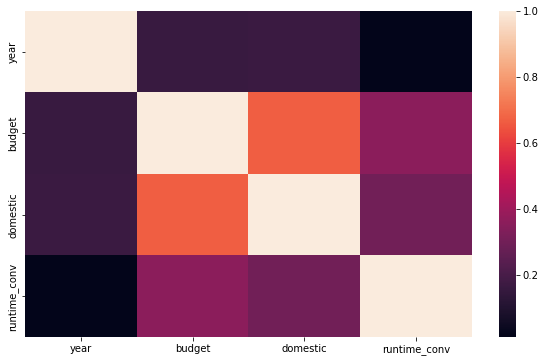

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(mojo_upd_df.corr())
plt.show()

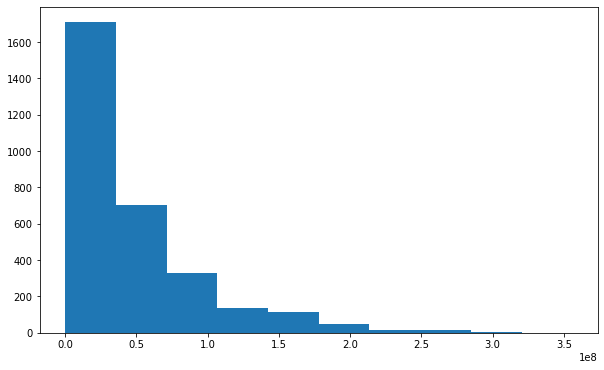

In [33]:
plt.figure(figsize=(10,6))
plt.hist(mojo_upd_df["budget"])
plt.show()

In [34]:
rotten_tomatoes_df = pd.read_csv('Resources/rotten_tomatoes_movies.csv')

In [35]:
rotten_tomatoes_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning Thief,"Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld.","Though it may seem like just another Harry Potter knockoff, Percy Jackson benefits from a strong supporting cast, a speedy plot, and plenty of fun with Greek mythology.",PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake Abel, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Melina Kanakaredes, Catherine Keener, Kevin Mckidd, Joe Pantoliano, Uma Thurman, Ray Winstone, Julian Richings, Bonita Friedericy, Annie Ilonzeh, Tania Saulnier, Marie Avgeropoulos, Luisa D'Oliveira, Christie Laing, Marielle Jaffe, Elisa King, Chrystal Tisiga, Alexis Knapp, Charlie Gallant, Chelan Simmons, Andrea Brooks, Natassia Malthe, Max Van Ville, Serinda Swan, Dimitri Lekkos, Ona Grauer, Stefanie von Pfetten, Conrad Coates, Erica Cerra, Dylan Neal, Luke Camilleri, Holly Hougham, Ina Geraldine, Raquel Riskin, Yusleidis Oquendo, Janine Edwards, Valerie Tian, Violet Columbus, Sarah Smyth, Merritt Patterson, Julie Luck, Andrea Day, John Stewart, Suzanne Ristic, Deejay Jackson, Matthew Garrick, Stan Carp, Suzanna Ristic, Richard Harmon, Maria Olsen, Robin Lemon, Doyle Devereux, Tom Pickett, VJ Delos-Reyes, Tim Aas, Keith Dallas, Spencer Atkinson, Maya Washington, Loyd Bateman, Victor Ayala, Zane Holtz, Eli Zagoudakis, Matt Reimer, Rob Hayter, Lloyd Bateman, Shawn Beaton, Jarod Joseph, Reilly Dolman, Paul Cummings, Julie Brar, Dejan Loyola, Damian Arman, Mario Casoria, Dorla Bell, Carolyn Adair (II), Jade Pawluk, G. Patrick Currie, Darian Arman, Mariela Zapata, David L. Smith",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,"Kate (Catherine Keener) and her husband Alex (Oliver Platt) are wealthy New Yorkers who prowl estate sales and make a tidy profit reselling items they bought cheaply. They buy the apartment next door and plan to remodel just as soon as its current occupant, a cranky old woman, dies. Kate is troubled by the way she and her husband earn a living, and tries to assuage her guilt by befriending her tenant and the woman's granddaughters, but her overtures lead to unexpected consequences.","Nicole Holofcener's newest might seem slight in places, but its rendering of complex characters in a conflicted economic landscape is varied, natural, and touching all the same.",R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, Rebecca Hall, Sarah Steele, Ann Morgan Guilbert, Kevin Corrigan, Lois Smith",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter falls hopelessly in love with the woman of his dreams, and even follows the girl and her new husband to their Mexican honeymoon resort. While his behavior seems sure to land him in trouble, out of the blue fate plays into his hands.","Blake Edwards' bawdy comedy may not score a perfect 10, but Dudley Moore's self-deprecating performance makes this midlife crisi

In [36]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [37]:
rotten_tomatoes_df.columns


Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [38]:
mojo_upd_df.to_csv("Resources/cleaned_mojo_budget_upd.csv",index=False)

In [41]:
#Input Mojo_budget_updata.csv file
cleaned_mojo_upd_df = pd.read_csv('Resources/cleaned_mojo_budget_upd.csv')

In [42]:
cleaned_mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      3068 non-null   object 
 1   title         3068 non-null   object 
 2   year          3068 non-null   int64  
 3   mpaa          3068 non-null   object 
 4   director      3068 non-null   object 
 5   main_actor_1  3068 non-null   object 
 6   main_actor_2  3068 non-null   object 
 7   main_actor_3  3068 non-null   object 
 8   main_actor_4  3068 non-null   object 
 9   budget        3068 non-null   float64
 10  domestic      3068 non-null   float64
 11  genre_1       3068 non-null   object 
 12  runtime_conv  3068 non-null   int64  
 13  full_date     3068 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 335.7+ KB


In [45]:
cleaned_mojo_upd_df.head()

,movie_id,title,year,mpaa,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,genre_1,runtime_conv,full_date
0,tt0099165,The Bonfire of the Vanities,1990,R,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,Comedy,125,1990-12-22
1,tt0099611,Frankenhooker,1990,R,Frank Henenlotter,James Lorinz,Joanne Ritchie,Patty Mullen,J.J. Clark,2500000.0,205068.0,Comedy,85,1990-06-01
2,tt0099674,The Godfather: Part III,1990,R,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,Crime,162,1990-12-25
3,tt0099747,Havana,1990,R,Sydney Pollack,Robert Redford,Lena Olin,Alan Arkin,Tomas Milian,40000000.0,9243140.0,Drama,144,1990-12-14
4,tt0100029,Lionheart,1990,R,Sheldon Lettich,Jean-Claude Van Damme,Harrison Page,Deborah Rennard,Lisa Pelikan,6000000.0,24078196.0,Action,108,1990-01-11
